# Notebook Practice:   heart disease prediction using logistic regression


## Setup and Imports

The following modules need to be installed in order to run this notebook live:  
* matplotlib  
* pandas  
* numpy  
* sklearn

In [1]:
# importing all necessery modules 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

You will also need to download the data file `heart.csv`

## Problem: Predicting heart disease using logistic regression  
### Part 1: Build the learning model  
Explore the heart disease data

In [2]:
# Load the heart disease dataset:
columns = ['Age', 'Oldpeak', 'MaxHR', 'HeartDisease']
heart_disease_dataframe = pd.read_csv(r"heart.csv")[columns]
heart_disease_dataframe.head()

,Age,Oldpeak,MaxHR,HeartDisease
0,40,0.0,172,0
1,49,1.0,156,1
2,37,0.0,98,0
3,48,1.5,108,1
4,54,0.0,122,0


Prepare train and test dataset:

In [3]:
# Select out X and Y
X_hd = heart_disease_dataframe[['Age', 'Oldpeak', 'MaxHR']].values
y_hd = heart_disease_dataframe['HeartDisease'].values

# Apply standard scaler to X.
X_hd = StandardScaler().fit_transform(X_hd)

# Train and test dataset for this problem.
X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(X_hd, y_hd, test_size=0.30, random_state=42)

### Part 2: Analysis

In [4]:
model = LogisticRegression().fit(X_train_hd, y_train_hd)
w = [model.intercept_, model.coef_]

print(f"Weights learned with sklearn LogisticRegression: {w}")

Weights learned with sklearn LogisticRegression: [array([0.23082056]), array([[ 0.20232843,  0.95339757, -0.79996645]])]


In [5]:
y_train_hd_pred = model.predict(X_train_hd)
train_loss = log_loss(y_train_hd, y_train_hd_pred)
y_test_hd_pred = model.predict(X_test_hd)
test_loss = log_loss(y_test_hd, y_test_hd_pred)

print(f"Log loss for sklearn LogisticRegression: Train: {train_loss}, Test: {test_loss}")

Log loss for sklearn LogisticRegression: Train: 8.71549056724691, Test: 9.385641359151407


In [6]:
train_accuracy = accuracy_score(y_train_hd, y_train_hd_pred)
test_accuracy = accuracy_score(y_test_hd, y_test_hd_pred)
print(f"Accuracy Train: {train_accuracy*100:.2f}%, Accuracy Test: {test_accuracy*100:.2f}%")

Accuracy Train: 74.77%, Accuracy Test: 72.83%


## Code explanation  
The above code consists of two parts:  

Part 1: Prepared the training and testing dataset and built the model using `LogisticRegression` from scikit learn package.  
The dataset consists of 4 columns: 'Age', 'Oldpeak', 'MaxHR', 'HeartDiseasei, in which the first three columns are heart disease factos and the last column indicates whether the person has heart disease or not. The `train_test_split` fucntion is called which splits the dataset into training and testing.  

Part 2: Analyzed the log loss and accuracy of the logistic regression model.  
I trained the model using `LogisticRegression().fit` on the trainind dataset. The log loss is analyzed using the `log_loss` function and accuracy is analyzed using the `accuracy_score` function.

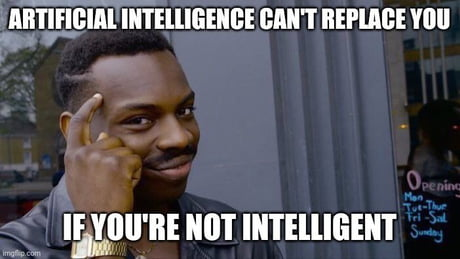